# FACTOR ANALYSIS (PCA)

## Case Study

Imagine you are a trainee of a start-up company and your boss is interested in customers’ opinion concerning a new product. Therefore, you decide to present the product in the shopping mall and hand in a pre-test to potential customers. In the end, you have a final sample of N=305 showing their opinion about the new product.

Based on the given data set ‘Case Study Customer Opinion’ with 10 varia-bles (c1 until c10), your boss ask you to perform a factor analysis due to the fact that a final survey already consists of a lot of questions and the fear of receiving no responses due to the long survey is too high.

| Variable |  Description |
| ----------- | :----------- |
| **c1** | Just do it describes the way I buy things |
| **c2** | This brand is totally in line with my lifestyle |
| **c3** | I would purchase this product |
| **c4** | I often buy things without thinking |
| **c5** |I would search after this product |
|**c6** | I would use this product |
| **c7** | This brand reflects my personal lifestyle |
| **c8** | I see it, I buy it if it describes me |
| **c9** | This brand brand supports my lifestyle |
| **c10** | Buy now, think about it later describe me |



In [22]:
import pyreadstat as py

from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df, meta = py.read_sav('C:/Users/Toshiba/Documents/OVGU/SS2021/Marketing Methods & Analysis/Exercise/EX3-Factor Analysis/Dataset/Case Study Customer Opinion.sav')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CASE    305 non-null    float64
 1   c1      305 non-null    float64
 2   c2      305 non-null    float64
 3   c3      305 non-null    float64
 4   c4      305 non-null    float64
 5   c5      305 non-null    float64
 6   c6      305 non-null    float64
 7   c7      305 non-null    float64
 8   c8      305 non-null    float64
 9   c9      305 non-null    float64
 10  c10     305 non-null    float64
 11  FAC1_1  305 non-null    float64
 12  FAC2_1  305 non-null    float64
 13  FAC3_1  305 non-null    float64
dtypes: float64(14)
memory usage: 33.5 KB


In [4]:
df = df.drop(['FAC1_1', 'FAC2_1', 'FAC3_1', 'CASE' ], axis=1)
df.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
0,1.0,4.0,6.0,1.0,6.0,5.0,7.0,1.0,5.0,1.0
1,6.0,5.0,6.0,3.0,2.0,3.0,5.0,2.0,3.0,6.0
2,3.0,1.0,7.0,1.0,7.0,4.0,1.0,1.0,1.0,4.0
3,6.0,4.0,5.0,4.0,5.0,4.0,4.0,6.0,3.0,6.0
4,4.0,1.0,7.0,4.0,7.0,3.0,1.0,4.0,1.0,4.0


## Principal Component Analysis (PCA) & FACTOR ANALYSIS (FA)

When we can't plot the data because it has too many dimensions, or when there are no data concentrations or clear separation in groups. When those situations occur, it's recommended to try reducing data dimensions with a method called Principal Component Analysis (PCA). PCA will reduce the dimensions of our data while trying to preserve as much of its information as possible.

PCA is efficient in finding the components that maximize variance. This is great if we are interested in reducing the number of variables while keeping a maximum of variance.

Sometimes, however, we are not purely interested in maximizating variance: we might want to give the most useful interpretations to our newly defined dimensions. And this is not always easiest with the solution found by a PCA. We can then apply **Factor Analysis**: an alternative to PCA that has a little bit more flexibility.

Factor Analysis tries to find latent variables that make sense to us. We can rotate the solution until we find latent variables that have a clear interpretation and “make sense”.

## ASSUMPTIONS (FA):

**Scale level**

* Variables should be measured on an interval or ratio scale level

**Sample size** :

* Minimum number of (valid) observations should be at least ten times the number of items/variables used for the analysis.

**Dependence of observations** :

* Observations need to be independent (i.e., only one observation from each individual, company, country etc.)

**Correlation between items/ variables** :

* Variables must be sufficiently correlated.

In [5]:
# First assumption is met we have more that n (11*10=110) observations
df.shape

(305, 10)

There is only one observation for each case hence the data is independent i.e  no repeated observations.

Next, check for correlation.

In [6]:
correlation = df.corr()

correlation

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
c1,1.000000,0.127285,0.103238,0.480061,0.013116,0.102808,0.190512,0.638406,0.122470,0.642311
c2,0.127285,1.000000,0.403355,0.225275,0.298420,0.446910,0.745592,0.189133,0.780758,0.102996
c3,0.103238,0.403355,1.000000,0.045013,0.702746,0.591848,0.377925,0.116039,0.332812,0.074557
c4,0.480061,0.225275,0.045013,1.000000,0.088465,0.082194,0.193867,0.545065,0.195528,0.496937
c5,0.013116,0.298420,0.702746,0.088465,1.000000,0.597852,0.253110,0.024700,0.271032,0.022497
c6,0.102808,0.446910,0.591848,0.082194,0.597852,1.000000,0.393744,0.140063,0.466978,0.078085
c7,0.190512,0.745592,0.377925,0.193867,0.253110,0.393744,1.000000,0.216157,0.669015,0.104804
c8,0.638406,0.189133,0.116039,0.545065,0.024700,0.140063,0.216157,1.000000,0.178124,0.660311
c9,0.122470,0.780758,0.332812,0.195528,0.271032,0.466978,0.669015,0.178124,1.000000,0.029249
c10,0.642311,0.102996,0.074557,0.496937,0.022497,0.078085,0.104804,0.660311,0.029249,1.000000


### Correlation/Adequacy test

There are several methods to check the sampling adequacy for correlation:

* Bartlett’s Test
* Kaiser-Meyer-Olkin Test
* Anti-Image matrix
* Kaiser-Meyer-Olkin (KMO)
* Bartlett's test of sphericity

#### Bartlett’s test of sphericity 
This test checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant (i.e $h_{0}$: variables are uncorrelated rejected ), you should not employ a factor analysis.

In [7]:
chi_square_value,p_value = calculate_bartlett_sphericity(df)
chi_square_value,p_value

(1569.9356108364054, 9.270124390372222e-300)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an **identity matrix**.

### Kaiser-Meyer-Olkin (KMO) Test

Measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [8]:
kmo_all, kmo_model = calculate_kmo(df)
kmo_model

0.789349682140623

The overall KMO for our data is 0.79, which is quite good. This value indicates that you can proceed with your planned factor analysis.

### Choosing the Number of Factors
For choosing the number of factors, you can use the **Kaiser criterion and scree plot**. Both are based on eigenvalues.

In [18]:
# factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=10, rotation=None)
fa.fit(df)

# Check Eigenvalues(ev)
ev, v = fa.get_eigenvalues()
ev = pd.DataFrame(ev)

# column rename
ev.rename(columns = {0:'Eigen Values'}, inplace=True)


ev

,Eigen Values
0,3.782296
1,2.447531
2,1.295331
3,0.582840
4,0.446407
5,0.365760
6,0.335484
7,0.302014
8,0.257978
9,0.184357


Here, you can see only for **3-factors** eigenvalues are greater than one. It means we need to choose only 3 factors.

**Screeplot**

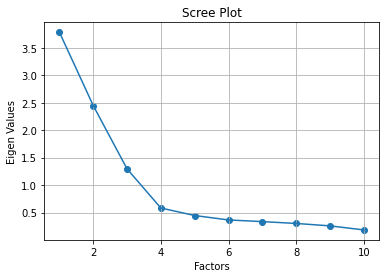

In [10]:
# range(start, stop, step)
plt.scatter(range(1,df.shape[1]+1), ev)
plt.plot(range(1,df.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Values')
plt.grid()
plt.show()

NB: As a rule of thumb always extract factors  less than the number indicated by the distint break ("Elbow")
    
In this case our elbow is at factor 4 so the ideal number of factors to be extracted is 4-1 = 3 factors which have eigenvalues > 1. 

## Extract Factors

#### Factor Loadings (Component Matrix)

* Assignment of variables to (extracted) factors.
* Component matrix (factor matrix): factor loadings of all variables on all factors extracted

**Steps of interpretation** :
* Assign each variable to a certain factor
based on its **maximum absolute factor**
loading
* Find an umbrella term for each factor that best describes the set of variables associated with that factor

**Attention** :
* In the component matrix, some variables might be highly correlated with more than one factor.
* Therefore, the unrotated factor solution can often be misleading!

In [21]:
# factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(df)
f_loadings = pd.DataFrame(fa.loadings_)

# column rename
f_loadings.rename(columns = {0:'F1', 1:'F2', 2:'F3'}, inplace=True)

# row indices rename
f_loadings.index = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10']
f_loadings



,F1,F2,F3
c1,0.774482,0.066217,0.033173
c2,0.107724,0.884941,0.229830
c3,0.057269,0.232917,0.788231
c4,0.617474,0.157624,0.019472
c5,-0.004454,0.111607,0.858272
c6,0.069472,0.348772,0.648021
c7,0.144387,0.756382,0.211719
c8,0.820868,0.121357,0.038689
c9,0.074724,0.824174,0.208899
c10,0.815465,-0.021055,0.038708


#### Extract factors

From above:

* Factor 1 has a high factor loadings for c1, c4, c8 and c10 (**IMPULSE BUYERS**).
* Factor 2 has a high factor loadings for c2, c7, and c9 (**BRAND LYFSTYLE FIT**).
* Factor 3 has a high factor loadings for c3, c5 and c6 (**PURCHASE INTENTION**).

In [12]:
# Get variance of each factor
df_fa = pd.DataFrame(fa.get_factor_variance())

# change column names
df_fa.rename(columns ={0:'F1', 
                       1:'F2', 
                       2:'F3'}, 
             inplace=True)
# change row indices
df_fa.index=['SS loadings (variance)', 'Proportional variance', 'Cumulative variance']

df_fa

,F1,F2,F3
SS loadings (variance),2.366065,2.267245,1.923630
Proportional variance,0.236606,0.226725,0.192363
Cumulative variance,0.236606,0.463331,0.655694


### Evaluate the goodness-of-fit of the factor solution
If the factors account for more than 0.5 of each variable’s variance, we can assume adequate fit. Especially a value
under 0.3 is problematic.In this case, we have extractions of at least 0.55 and therefore, we have a good model of
fit.

In [19]:
# communalities
values =fa.get_communalities()

communality = pd.DataFrame(values)

# Rename column
communality.columns = ['Extraction']

# row rename
communality.index = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10']

communality

,Extraction
c1,0.683357
c2,0.906857
c3,0.776051
c4,0.552165
c5,0.814258
c6,0.634080
c7,0.697954
c8,0.759881
c9,0.793047
c10,0.728883


### Reliability Analysis (Cronbach Alpha)

Cronbach’s Alpha is a measure of reliability. To be exact, it tells us how internally consistent our scale is. This is the degree to which all items in a scale measure the same construct

In [33]:
def cronbach_alpha(df_new):
    # 1. Transform the df into a correlation matrix
    df_corr = df_new.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df_new.shape[1]
    
    
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array called "rc". Then, we'll
    # calculate the mean of "rc"
    rc = np.array([])
    
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rc = np.append(sum_, rc)
        mean_rc = np.mean(rc)
    
    # 3. Use the formula to calculate Cronbach's Alpha
    cronbach_alpha = (N*mean_rc) / (1+(N-1)*mean_rc)
    
    return cronbach_alpha





Factor 1 :c1, c4, c8 and c10

In [32]:
df1 = df.loc[:,['c1', 'c4', 'c8', 'c10']]

cronbach_alpha(df1)

0.8452091413564088

Factor 2 : c2, c7, and c9 

In [34]:
df2 = df.loc[:,['c2', 'c7', 'c9']]

cronbach_alpha(df2)

0.8911291192099354

Factor 6:c3, c5 and c6 
    

In [35]:
df3 = df.loc[:,['c3', 'c5', 'c6']]

cronbach_alpha(df3)

0.836761807421112

### Reporting the Factor Analysis

The factor analysis identifies 3 extracted factors explaining almost 66% of the total variance . The
first factor (N=4; $\alpha$ = .85) refers to IMPULSE BUYERS customers , the second factor((N=3; $\alpha$=.89)) can be categorized as PURCHASE INTENTION while the third  factor(N=3; $\alpha$=.84) is BRAND LYFSTYLE FIT customers